# What is **Activation Function**
### from last part we use step function to classify output
# $$
\begin{align}
a_i = a(\vec{x_i}) = \sum_{j=0}^{m-1}w_i x_{i,j} + b \\
h_i = h(\vec{x_i}) = 
\begin{cases} 
        1 & a_i \ge 0 \\
        0 & a_i < 0
   \end{cases}
\end{align}
$$

## ***$h_i$*** above is "Step function" it's not optimized
## we want some function that more **Delicate/Sensitive** 

# $$
h_i = sigmoid(a_i) = \dfrac{1}{1+ e^{-a_i}}
$$
![Activation functions](https://www.researchgate.net/profile/Rahul-Jayawardana/publication/350567223/figure/fig3/AS:1007855343767554@1617302847631/Fig-3-The-basic-activation-functions-of-the-neural-networksNeural-Networks.jpg)
## Good to knows : Step function is also most basic Activation function 

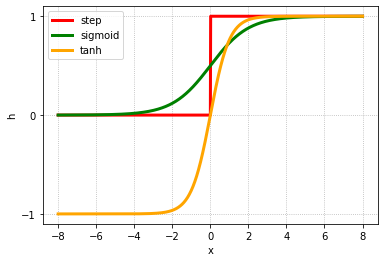

In [20]:
import numpy as np
import matplotlib.pyplot as plt 

def sigmoid(x):
    return 1/(1+np.exp(-x))
def step(x):
    # return 0 if x < 0 else 1
    return x > 0 # return boolean
def tanh(x):
    # (e**x - e**-x)/(e**x + e**-x)
    e = np.exp
    return (e(x) - e(-x))/(e(x) + e(-x))

x = np.linspace(-8,8, 1001)

plt.axes(yticks=[-1,0,1] , xlabel='x', ylabel='h', )
plt.plot(x, step(x), 'r', lw=3, label='step')
plt.plot(x, sigmoid(x), 'g', lw=3, label='sigmoid')
plt.plot(x, tanh(x), 'orange', lw=3, label='tanh')

plt.grid(ls=':')
plt.legend()
plt.show()
    

# Loss Function
## the more **loses-function-value $\rightarrow$ bad**
## Simple loss function is **Squared Deviation**
# $$
\scriptsize{Squared \: Deviation} \quad  J_i = J(\vec{x_i}) = (h_i - z_i)^2 \; \scriptsize{for \: regression}\\ 
\scriptsize{Cross \: Entropy} \quad  J_i = -z_i ln(h_i) - (1-z_i) ln(1-h_i) \; \scriptsize{for \: classification}
$$
### $\text{where $z_i$ is real value (not from prediction)}$
![Cross entropy loss](http://androidkt.com/wp-content/uploads/2021/05/Selection_099-1024x200.png)

# Gradient = Partial Derivation
# $$ \large{ J \propto h \propto a \propto w, b  } $$
## Write derivation $J$ depends on smallest units $w, b$
# $ \large{ 
\frac{\partial J}{\partial w} = \frac{\partial J}{\partial h} 
\frac{\partial h}{\partial a} 
\frac{\partial a}{\partial w}
}
$
# $ \large{ 
\frac{\partial J}{\partial b} = \frac{\partial J}{\partial h} 
\frac{\partial h}{\partial a} 
\frac{\partial a}{\partial b}
}
$
---
## From Cross entropy
# $ 
\begin{align}
\normalsize{ 
\frac{\partial J}{\partial h} 
= \frac{z}{h} - \frac{1-z}{1-h} 
= \frac{h-z}{h(1-z)}
}
\tag{1}
\end{align}
$
---
## From Sigmoid
# $ 
\begin{align}
\normalsize{ 
\frac{\partial h}{\partial a} =
h(1-h)
\tag{2}
}
\end{align}
$
---
## From $a_i$
# $ 
\begin{align}
\normalsize{ 
\frac{\partial a}{\partial w} = x_{j,i} \\ 
\frac{\partial a}{\partial b} = 1 
}
\end{align}
$

# From $(1) \: x \: (2)$
# $$
g_{a_i} = 
\frac{\partial J}{\partial a} = \frac{\partial J}{\partial h} \frac{\partial h}{\partial a} = h_i - z_i
$$

# Adjust Parameters
# $$
\Delta w_j = - \eta g_{w_j} \\
w_{j, new} = w_{j, old} + \Delta w_j
$$
# Apply to Matrix Concepts
# $$
\begin{align}
&\Delta \vec{w} = - \eta \vec{g_w} \\
&\vec{w_{new}} = w_{old} + \Delta \vec{w} \\\\
&\Delta \vec{b} = - \eta \vec{g_b} \\
&\vec{b_{new}} = b_{old} + \Delta \vec{b} 
\end{align}
$$

# Gradient Descendent
- **Logistic regression analysis**
    - classification
    - parameter adjustable perceptron
    - sigmoid activation function
# $$
\begin{align}
J = \frac{1}{n} \sum_{i=0}^{n-1} J_i
\end{align}
$$

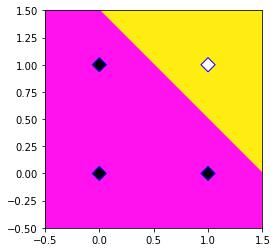

In [26]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def cross_entropy(z, h):
    return -(z*np.log(h) + (1-z) * np.log(1-h))
    
X = and_gate = np.array([
    [0,0],
    [1,0],
    [0,1],
    [1,1]
])
z = np.array([0,0,0,1])
n = len(z)
w = init_weidge = np.array([0,0.0])
b = 0
eta = .8
n_learns = 260
entropy = []

for o in range(n_learns):
    for i in range(n): # This Procedure is not optimized => see next part (p4)
        a_i = np.dot(X[i], w) + b
        h_i = sigmoid(a_i)
        g_a_i = h_i - z[i]
        g_w_i = g_a_i * X[i]
        g_b_i = g_a_i
        
        # weigth adjustion
        w -= eta * g_w_i
        b -= eta * g_b_i
        
        J = cross_entropy(z[i], h_i)
        entropy.append(J)
        
# viz
mx, my = np.meshgrid(np.linspace(-0.5, 1.5, 200), np.linspace(-0.5, 1.5, 200))
mX = np.array([mx.ravel(), my.ravel()]).T
mh = np.dot(mX, w) + b
# NO SIGMOID
mz = (mh >= 0 ).astype(int).reshape(200, -1)

plt.axes(aspect=1)
plt.contourf(mx,my,mz, cmap='spring')
plt.scatter(X[:,0], X[:,1], s=100, c=z, edgecolor='b', marker='D', cmap='gray' )
plt.show()

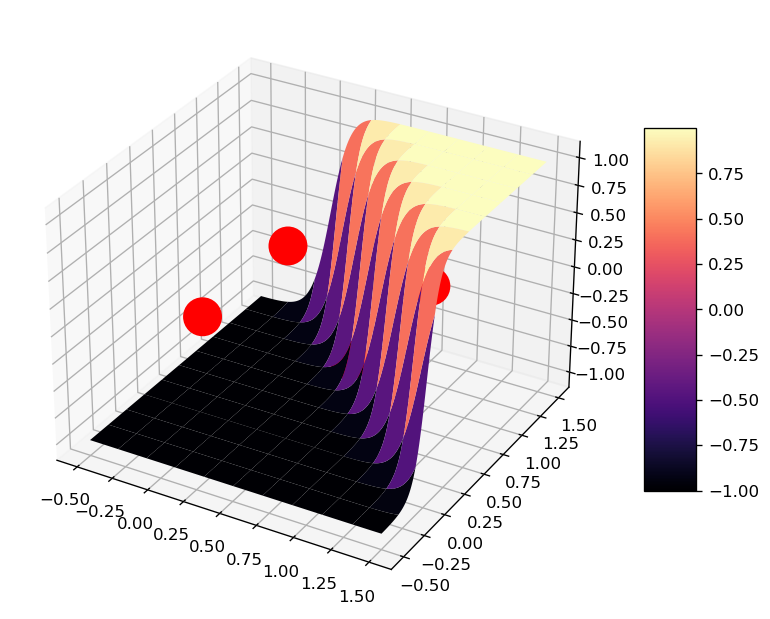

In [150]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(8,8), dpi=120)
ax = plt.axes(projection='3d', )

surf = ax.plot_surface(mx,my,mz, cmap=plt.cm.magma, rstride=20, cstride=20)
plt.scatter(X[:,0], X[:,1], s=500, c='r', zorder=99, alpha=1, )
# plt.bar(x[:,0], width=1)
plt.colorbar(surf, shrink=.5, aspect=7)
plt.show()

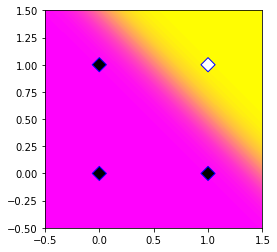

In [29]:
mz = sigmoid(mh).reshape(200,-1)
plt.axes(aspect=1)
plt.contourf(mx,my,mz,50,cmap='spring')
plt.scatter(X[:,0],X[:,1],100,c=z,edgecolor='b',marker='D',cmap='gray')
plt.show()

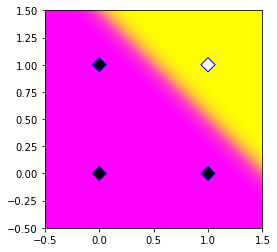

In [60]:
mz = tanh(mh).reshape(200,-1)
plt.axes(aspect=1)
plt.contourf(mx,my,mz,50,cmap='spring')
plt.scatter(X[:,0],X[:,1],100,c=z,edgecolor='b',marker='D',cmap='gray')
plt.show()

# Probability Prediction

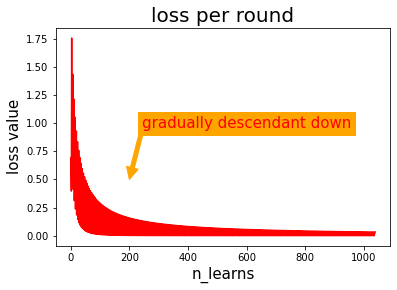

In [95]:
plt.plot(entropy, 'r')

plt.xlabel('n_learns', size=15)
plt.ylabel('loss value', size=15)
plt.title('loss per round', size=20)
plt.annotate(text='gradually descendant down', xy=(200,.5), xytext=(600,1), 
            bbox=dict(color='orange'), 
            arrowprops=dict(color='orange', ),
             fontsize=15, color='red',
            ha='center', va='center')
plt.show()

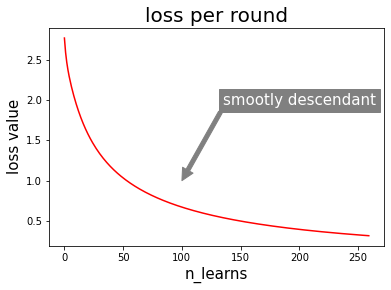

In [163]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def cross_entropy(z, h):
    return -(z*np.log(h) + (1-z) * np.log(1-h))
    
X = and_gate = np.array([
    [0,0],
    [1,0],
    [0,1],
    [1,1]
])
z = np.array([0,0,0,1])
n = len(z)
w = init_weidge = np.array([0,0.0])
b = 0
eta = .8
n_learns = 260
entropy = []

for o in range(n_learns):
    dw = db = J = 0
    for i in range(n):
        a_i = np.dot(X[i], w) + b
        h_i = sigmoid(a_i)
        g_a_i = h_i - z[i]
        g_w_i = g_a_i * X[i]
        g_b_i = g_a_i
        
        # weigth adjustion
        dw -= eta * g_w_i
        db -= eta * g_b_i
        
        J += cross_entropy(z[i], h_i)
    w += dw/n
    b += db/n
    entropy.append(J)
        
plt.plot(entropy, 'r')
plt.xlabel('n_learns', size=15)
plt.ylabel('loss value', size=15)
plt.title('loss per round', size=20)
plt.annotate(text='smootly descendant', xy=(100,1), xytext=(200,2), 
            bbox=dict(color='gray', ), 
            arrowprops=dict(color='gray', ),
             fontsize=15, color='white',
            ha='center', va='center')
plt.show()